In [39]:
def find_p(c): ##Small program used to find the p for each function
    if c == 1/4:
        return 1/2
    p1,p2 = complex((1 + sqrt(1-4*c)/2)), complex((1 - sqrt(1-4*c)/2))
    if abs(2*p1) > 1:
        return p1
    else:
        return p2
    

In [40]:
def preimage(z, c): ##Finds the preimages of points that calls the IIM uses. 
    return [complex(sqrt(z - c)), complex(-1 * sqrt(z-c))]

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.87 µs


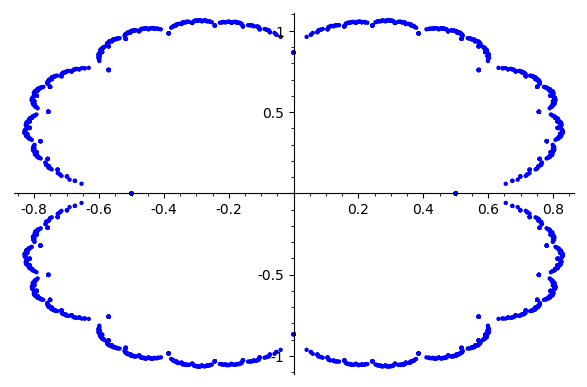

In [81]:
%time
def plotIIM(c, N):   ##for plotting the IIM 
    L = [find_p(c)]
    for i in L:
        L += preimage(i, c)
        N -= 1
        if N < 1:
            break
    return list_plot(L)

plotIIM(0.25, 1000)

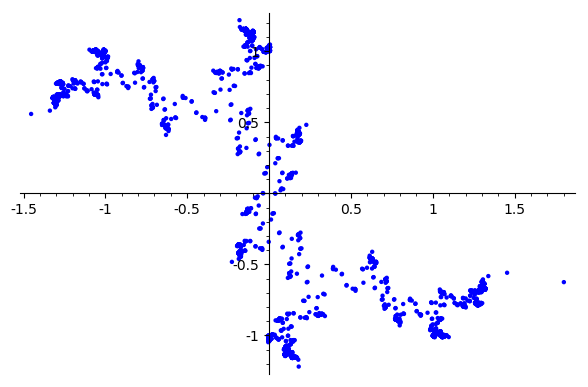

In [80]:
plotIIM(1j, 1000)

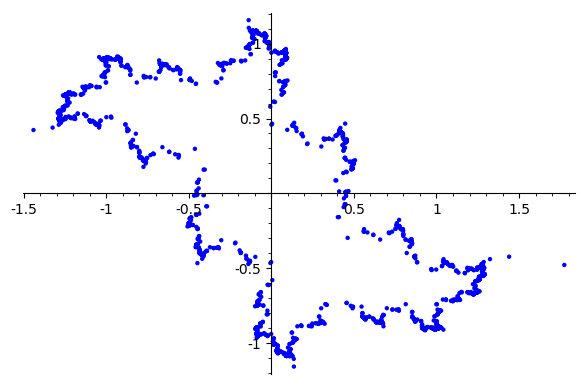

In [75]:
plotIIM(-0.12 +0.74j, 1000)

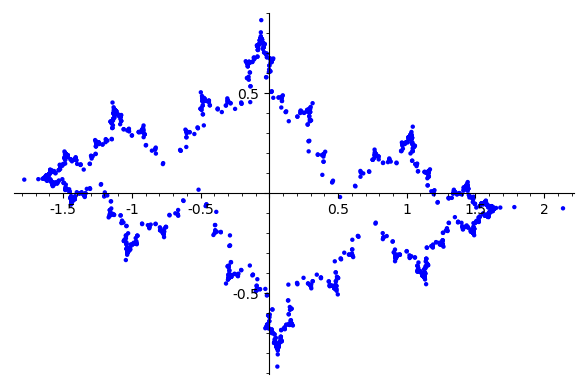

In [76]:
plotIIM(-1.037 + 0.17j, 1000)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 8.11 µs


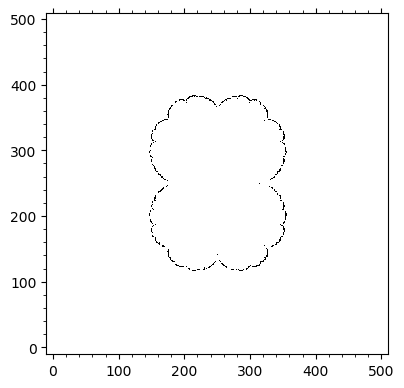

In [45]:
%time
import numpy as np

def IIM(c, N):   
    L = [find_p(c)]
    for i in L:
        L += preimage(i, c)
        N -= 1
        if N < 1:
            break
    return L


def grid_IIM(c, N, num): ##This part is the code that is used to produce a grid
    m = np.zeros((num, num))
    x0,y0 = -2, -2
    step = 4/num
    
    for z in IIM(c, N):
        x,y = real(z), imaginary(z)
        a = int(round((x-x0)/step))
        b = int(round((y-y0)/step))
        
        if 0 <= a < num and 0 <= b < num:
            m[b, a] = 1
    return matrix_plot(m, origin = "lower")

grid_IIM(0.25, 10000, 500)

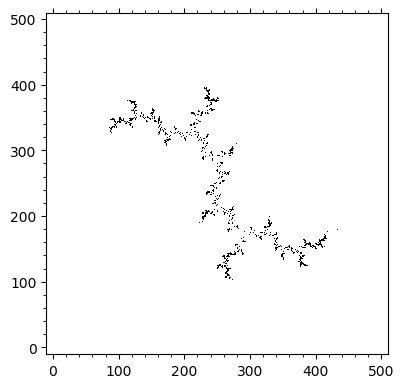

In [47]:
grid_IIM(1j, 10000, 500)

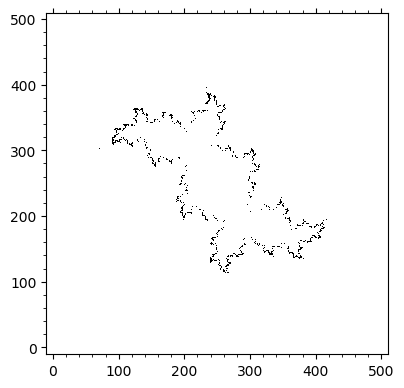

In [48]:
grid_IIM(-0.12 +0.74j, 10000, 500)

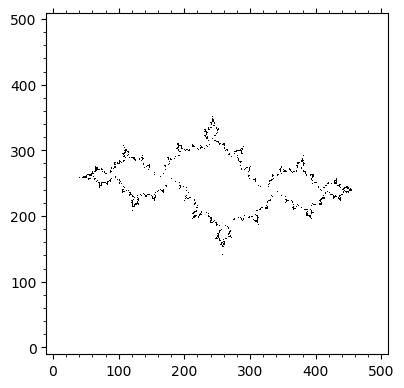

In [49]:
grid_IIM(-1.037 + 0.17j, 10000, 500)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.15 µs


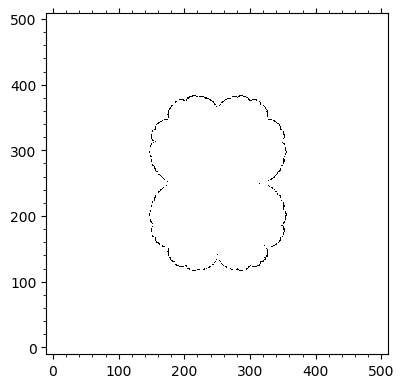

In [68]:
%time
import random
import numpy as np

##This randPreimage is for part 6c. Choosing a random preimage in order to 
##produce a better image in less time. Choosing a random preimage allows the 
## program to be one step ahead 

def randPreimage(z, c):
    z1 = complex(sqrt(z - c))
    if randint(0,1):
        return [z1]
    return [-z1]


def IIM(c, N):   
    L = [find_p(c)]
    for i in L:
        L += randPreimage(i, c)
        N -= 1
        if N < 1:
            break
    return L


def grid_IIM(c, N, num):
    m = np.zeros((num, num))
    x0,y0 = -2, -2
    step = 4/num
    
    for z in IIM(c, N):
        x,y = real(z), imaginary(z)
        a = int(round((x-x0)/step))
        b = int(round((y-y0)/step))
        
        if 0 <= a < num and 0 <= b < num:
            m[b, a] = 1
    return matrix_plot(m, origin = "lower")

grid_IIM(0.25, 10000, 500)


CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 6.91 µs


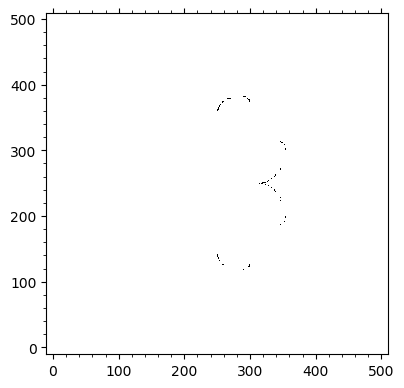

In [71]:
%time
import random
import numpy as np

##This "improvementPreimage" is for part 7, it should be able to go faster than
##choosing a random preimage because instead of going one step ahead, it is
##going two steps ahead and plotting. 

def improvementPreimage(z, c):
    z1 = complex(sqrt(z - c))
    q1 = complex(sqrt(z1 - c))
    q2 = complex(sqrt(-z1 - c))
    r = randint(0, 1)
    if r == 0:
        return [q1]
    if r == 1:
        return [q2]


def IIM(c, N):   
    L = [find_p(c)]
    for i in L:
        L += improvementPreimage(i, c)
        N -= 1
        if N < 1:
            break
    return L


def grid_IIM(c, N, num):
    m = np.zeros((num, num))
    x0,y0 = -2, -2
    step = 4/num
    
    for z in IIM(c, N):
        x,y = real(z), imaginary(z)
        a = int(round((x-x0)/step))
        b = int(round((y-y0)/step))
        
        if 0 <= a < num and 0 <= b < num:
            m[b, a] = 1
    return matrix_plot(m, origin = "lower")

grid_IIM(0.25, 1000000, 500)   